In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Lab/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [6]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-6-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [7]:
df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]

<ipython-input-7-b1a497fe803c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]


In [8]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [9]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [13]:
x_train.shape

(389003, 17)

In [14]:
x_test.shape

(166716, 17)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [20]:
ros = RandomOverSampler()
over_x, over_y = ros.fit_resample(x_train, y_train)

rus = RandomUnderSampler()
under_x, under_y = rus.fit_resample(x_train, y_train)

smote = SMOTE()
smote_x, smote_y = smote.fit_resample(x_train, y_train)

# 3.) Train three logistic regression models

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
ros_reg = LogisticRegression().fit(over_x, over_y)
rus_reg = LogisticRegression().fit(under_x, under_y)
smote_reg = LogisticRegression().fit(smote_x, smote_y)

# 4.) Test the three models

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
y_pred_ros = ros_reg.predict(x_test)
y_pred_rus = rus_reg.predict(x_test)
y_pred_smote = smote_reg.predict(x_test)

In [32]:
# For Oversample Data
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_ros)
print("Oversample Accuracy:", accuracy)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_ros)
print("Oversample Confusion Matrix:")
print(conf_mat)

# Calculate sensitivity
true_positives = conf_mat[1, 1]
false_negatives = conf_mat[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)
print("Oversample Sensitivity:", sensitivity)

Oversample Accuracy: 0.1677103577341107
Oversample Confusion Matrix:
[[ 27353 138735]
 [    21    607]]
Oversample Sensitivity: 0.9665605095541401


In [28]:
# For Undersample Data
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rus)
print("Undersample Accuracy:", accuracy)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rus)
print("Undersample Confusion Matrix:")
print(conf_mat)

# Calculate sensitivity
true_positives = conf_mat[1, 1]
false_negatives = conf_mat[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)
print("Undersample Sensitivity:", sensitivity)

Undersample Accuracy: 0.9544974687492502
Undersample Confusion Matrix:
[[158666   7422]
 [   164    464]]
Undersample Sensitivity: 0.7388535031847133


In [31]:
# For SMOTE Data
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_smote)
print("SMOTE Accuracy:", accuracy)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_smote)
print("SMOTE Confusion Matrix:")
print(conf_mat)

# Calculate sensitivity
true_positives = conf_mat[1, 1]
false_negatives = conf_mat[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)
print("SMOTE Sensitivity:", sensitivity)

SMOTE Accuracy: 0.17060750017994675
SMOTE Confusion Matrix:
[[ 27838 138250]
 [    23    605]]
SMOTE Sensitivity: 0.9633757961783439


# 5.) Which performed best in Out of Sample metrics?

- If we use accuracy as the measure, we would think that logistic regression model for undersample data performed best. 
- If we use sensitivity as the measure, we would
think that logistic regression model for oversample data performed best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [33]:
rawdata = pd.concat([x_train, y_train], axis = 1)

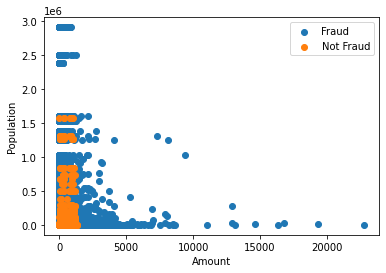

In [51]:
plt.scatter(rawdata[rawdata["is_fraud"] == 0]["amt"],rawdata[rawdata["is_fraud"] == 0]["city_pop"])
plt.scatter(rawdata[rawdata["is_fraud"] == 1]["amt"],rawdata[rawdata["is_fraud"] == 1]["city_pop"])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()

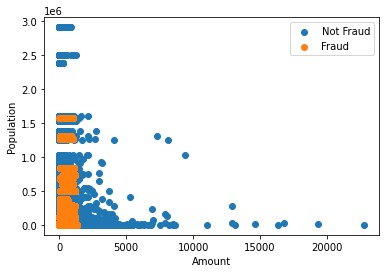

In [52]:
smotedata = pd.concat([smote_x, smote_y], axis = 1)
plt.scatter(smotedata[smotedata["is_fraud"] == 0]["amt"],smotedata[smotedata["is_fraud"] == 0]["city_pop"])
plt.scatter(smotedata[smotedata["is_fraud"] == 1]["amt"],smotedata[smotedata["is_fraud"] == 1]["city_pop"])
plt.legend(['Not Fraud', 'Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()